#Problema de la Propina - Easy
Al dar la propina se considera la calidad del servicio y la comida, calificándolos entre 0 y 10. Se utilizan los dos factores mencionados para dejar una propina de entre 0 a 25%.

**Reglas**:

- Si el servicio es bueno o la calidad de la comida es buena, entonces la propina sera alta. 
- Si el servicio es promedio, entonces, la propina será media. 
- Si el servicio es deficiente o la calidad de la comida es deficiente, entonces la propina será baja. 

## Instalación Librería Scikit-Fuzzy y carga de librerías al programa

In [ ]:
!pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 19.9 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=f0919352529a34e77ea0c74db322291dedb0ef75d69586b49ffdc4e7f91d706c
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Declaración de los antecedentes y consecuentes con su universo de discurso.
 
Antecedentes (Entradas):

**Servicio**:

- Universo de Discurso: Que tan bueno es el servicio de los meseros en una escala **de 0 a 10**.

- Conjuntos Difusos: deficiente, aceptable, excelente. 

**Calidad de la Comida**:
- Universo de Discurso: Que tan sabrosa era la comida, en una escala  de **0 a 10**. 
-Conjunto Difuso: mala, decente, excelente. 

**Consecuencia (Salida)**:

- Propina:
Universo de Discurso: que porcentaje se debe dejar de propina, en una escala de 0% a 25%. 
- Conjuntos Difusos: Bajo, Medio, Alto. 

In [ ]:
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

## Definición Funciones de membresia

In [ ]:
#Funciones de membresia Automaticas
quality.automf(3)
service.automf(3)

In [ ]:
#Funciones de membresia personalizadas
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

### Se pueden observar las funciones de membresia utilizando el comando .view()

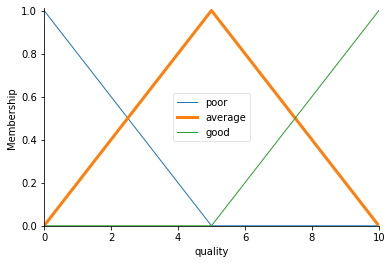

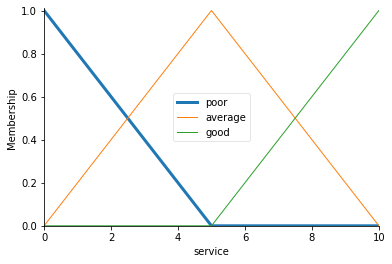

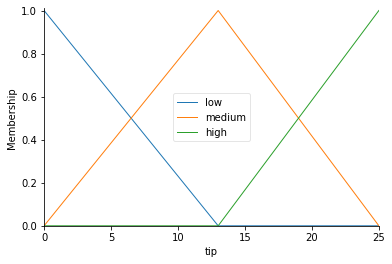

In [ ]:
# Se pueden observar las funciones de membresia utilizando el comando .view()
quality['average'].view()
service['poor'].view()
tip.view()

## Creación de Reglas

**Reglas**:

- Si el servicio es deficiente o la calidad de la comida es deficiente, entonces la propina será baja. 
- Si el servicio es promedio, entonces, la propina será media. 
- Si el servicio es bueno o la calidad de la comida es buena, entonces la propina sera alta. 

In [ ]:
rule1 = ctrl.Rule(service['poor'] | quality['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

##Implementación del sistema de inferencia - Control

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

## Prueba de Funcionamiento

Tip:  13.32


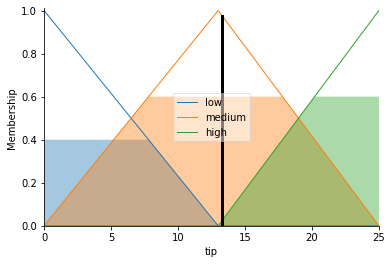

In [ ]:
tipping.input['quality'] = 8 # comida
tipping.input['service'] = 3 # servicio

tipping.compute()
print("Tip: ", round(tipping.output['tip'],2))
tip.view(sim=tipping)